In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dataset=pd.read_csv("train_data.txt",sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [5]:
dataset

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [9]:
dataset.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [11]:
dataset.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [13]:
dataset["GENRE"].value_counts()

GENRE
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

In [15]:
dataset["GENRE"].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

([<matplotlib.patches.Wedge at 0x1e751988f80>,
 [Text(0.7751310052677347, 0.7804946666522656, ' drama '),
  Text(-0.762411592605899, 0.7929240590751027, ' thriller '),
  Text(-1.0193079400360507, -0.41353515374084354, ' adult '),
  Text(-0.4882199992075867, -0.9857186375298705, ' documentary '),
  Text(-0.04199629696967724, -1.0991980308574225, ' comedy '),
  Text(0.19879898575660607, -1.0818867608313474, ' crime '),
  Text(0.3773134294046659, -1.0332640398227795, ' reality-tv '),
  Text(0.5139243650170421, -0.9725645207603609, ' horror '),
  Text(0.6185204948981458, -0.9096331114196278, ' sport '),
  Text(0.7034192435309771, -0.8456957891761719, ' animation '),
  Text(0.7768477821813463, -0.7787859290716056, ' action '),
  Text(0.8417695873925628, -0.7081129583201785, ' fantasy '),
  Text(0.8964960475145264, -0.6374126111011863, ' short '),
  Text(0.9425508211632994, -0.5670960672799541, ' sci-fi '),
  Text(0.9807459110791389, -0.49813397585544206, ' music '),
  Text(1.010359106500896

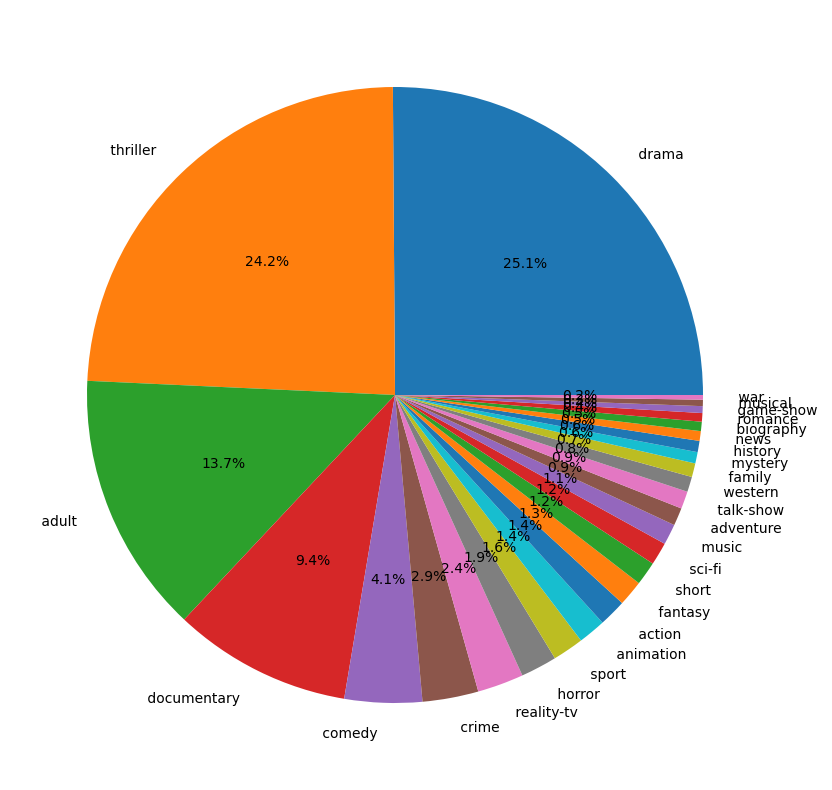

In [17]:
fig=plt.figure(figsize=(25,10))
plt.pie(dataset["GENRE"].value_counts(),labels=[' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], autopct= '%0.1f%%')

C:\Users\rajag\AppData\Local\Temp\ipykernel_11984\250266615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x="GENRE", order= dataset["GENRE"].value_counts().index, palette = "YlGnBu",color="r")


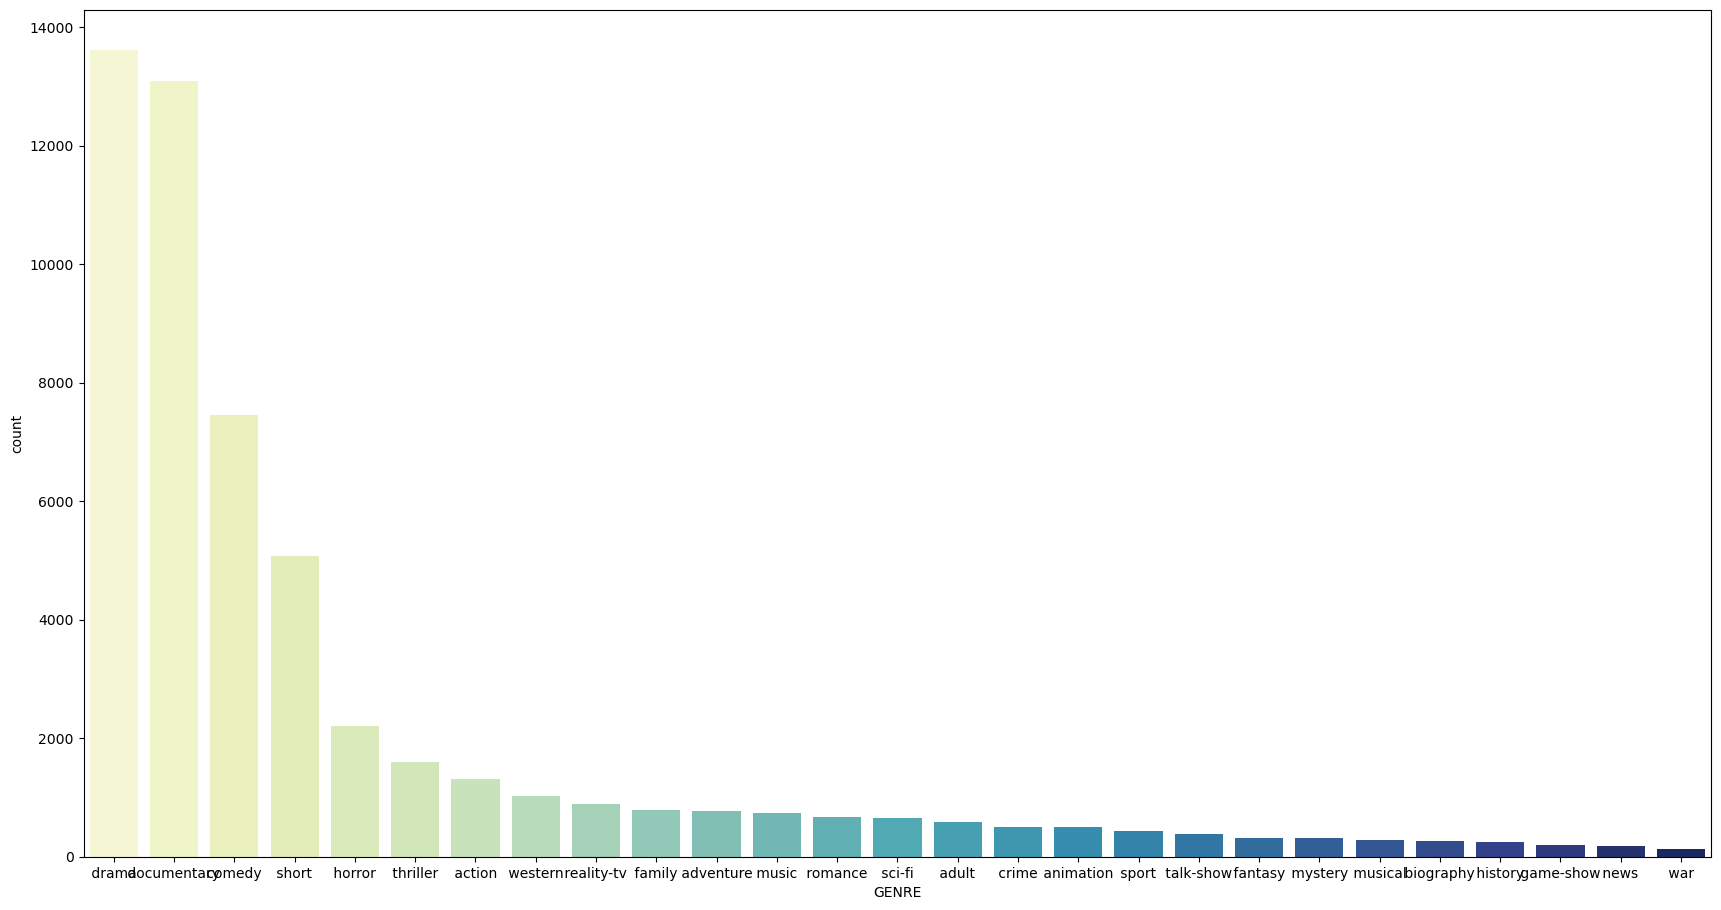

In [19]:
plt.figure(figsize=(21,11))
sns.countplot(data=dataset, x="GENRE", order= dataset["GENRE"].value_counts().index, palette = "YlGnBu",color="r")
plt.show()

In [22]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

In [24]:
def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  
    return text

In [26]:
dataset["TextCleaning"] = dataset["DESCRIPTION"].apply(cleaning_data)
# test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)

In [27]:
dataset

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [30]:
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(dataset["TextCleaning"])

X_test = vectorize.transform(dataset["TextCleaning"])

In [32]:
X_train

<54214x116601 sparse matrix of type '<class 'numpy.float64'>'
	with 2607208 stored elements in Compressed Sparse Row format>

In [34]:
X_test

<54214x116601 sparse matrix of type '<class 'numpy.float64'>'
	with 2607208 stored elements in Compressed Sparse Row format>

In [36]:
x=X_train
y=dataset["GENRE"]

In [38]:
x

<54214x116601 sparse matrix of type '<class 'numpy.float64'>'
	with 2607208 stored elements in Compressed Sparse Row format>

In [40]:
y

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
54210          comedy 
54211          horror 
54212     documentary 
54213          comedy 
54214         history 
Name: GENRE, Length: 54214, dtype: object

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [44]:
# gnb =MultinomialNB()

In [46]:
# model=gnb.fit(x_train,y_train)

In [48]:
# model.classes_

In [50]:
# model

In [52]:
from sklearn.linear_model import LogisticRegression

In [54]:
model=LogisticRegression()
model.fit(x_train, y_train)

C:\Users\rajag\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
model.classes_

array([' action ', ' adult ', ' adventure ', ' animation ', ' biography ',
       ' comedy ', ' crime ', ' documentary ', ' drama ', ' family ',
       ' fantasy ', ' game-show ', ' history ', ' horror ', ' music ',
       ' musical ', ' mystery ', ' news ', ' reality-tv ', ' romance ',
       ' sci-fi ', ' short ', ' sport ', ' talk-show ', ' thriller ',
       ' war ', ' western '], dtype=object)

In [58]:
model.score(x_train,y_train)

0.7041571557031195

In [61]:
model.intercept_

array([ 0.41333315, -0.13165999,  0.16275962, -0.23185567, -0.90475043,
        2.04119494, -0.32763412,  2.21488057,  2.379457  , -0.07980214,
       -0.62724768, -1.39779449, -0.89905   ,  0.4713518 , -0.19288717,
       -0.73300987, -0.65206352, -1.02892114,  0.08823377, -0.32716949,
       -0.25040086,  2.24416233, -0.34336041, -0.55960018,  0.3063689 ,
       -1.66242184,  0.0278869 ])

In [63]:
model.coef_

array([[ 0.17321777, -0.00201194, -0.00237029, ..., -0.00813504,
        -0.00832172, -0.00168293],
       [-0.00835327, -0.0009969 , -0.001544  , ..., -0.00427052,
        -0.00354278, -0.00102535],
       [-0.01350673, -0.00173676, -0.00206306, ..., -0.00741554,
        -0.00525297, -0.00148336],
       ...,
       [-0.01748871, -0.00184032, -0.00389084, ..., -0.00841056,
        -0.00604376, -0.00172285],
       [-0.00242441, -0.00031128, -0.00042747, ..., -0.00119368,
        -0.00105512, -0.00023511],
       [-0.01052081, -0.00097735, -0.00113857, ..., -0.00460418,
        -0.00496789, -0.00128901]])

In [65]:
y_pred = model.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  49,    1,    0,    0,    0,   31,    0,   35,  107,    0,    0,
           0,    0,    5,    0,    0,    0,    0,    0,    0,    6,   10,
           1,    0,    2,    0,    1],
       [   0,   30,    6,    0,    0,   37,    0,    6,   22,    0,    0,
           0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    6,
           0,    0,    0,    0,    2],
       [   4,    5,   19,    0,    0,   21,    0,   30,   51,    1,    0,
           0,    0,    6,    0,    0,    0,    0,    2,    0,    1,    9,
           0,    0,    1,    0,    0],
       [   1,    0,    1,    0,    0,   44,    0,   20,   27,    0,    0,
           0,    0,    3,    0,    0,    0,    0,    0,    0,    0,   11,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,   37,   13,    0,    0,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    0,    0],
       [   4,    0,    0,    0,    0,  885,    0,  106,  454,    

In [69]:
print(classification_report(y_test, y_pred))

C:\Users\rajag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.57      0.20      0.29       248
       adult        0.81      0.27      0.41       110
   adventure        0.73      0.13      0.22       150
   animation        0.00      0.00      0.00       107
   biography        0.00      0.00      0.00        52
      comedy        0.54      0.59      0.56      1497
       crime        0.20      0.01      0.02        90
 documentary        0.65      0.87      0.74      2586
       drama        0.54      0.81      0.65      2773
      family        0.58      0.04      0.08       164
     fantasy        0.00      0.00      0.00        67
   game-show        0.82      0.42      0.56        33
     history        0.00      0.00      0.00        47
      horror        0.69      0.56      0.62       424
       music        0.77      0.33      0.46       163
     musical        0.00      0.00      0.00        56
     mystery        0.00      0.00      0.00        55
        n

C:\Users\rajag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rajag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
